In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
survey=pd.read_excel('Sample Survey.xlsx', sheet_name='Data')

In [4]:
survey.columns

Index(['response_id', 'collection_date', 'urban_rural', 'education', 'income',
       'Vote_Now', 'Past_Vote', 'CM_satisfaction', 'MLA_satisfaction', 'age',
       'gender', 'assembly_no', 'category', 'weight'],
      dtype='object')

In [5]:
survey.dtypes

response_id                  int64
collection_date     datetime64[ns]
urban_rural                 object
education                   object
income                      object
Vote_Now                    object
Past_Vote                   object
CM_satisfaction             object
MLA_satisfaction            object
age                         object
gender                      object
assembly_no                  int64
category                    object
weight                     float64
dtype: object

In [6]:
survey.isna().sum() ## no missing values

response_id         0
collection_date     0
urban_rural         0
education           0
income              0
Vote_Now            0
Past_Vote           0
CM_satisfaction     0
MLA_satisfaction    0
age                 0
gender              0
assembly_no         0
category            0
weight              0
dtype: int64

In [7]:
survey.shape

(6867, 14)

In [8]:
survey['response_id'].nunique()

6867

In [201]:
####day of the month(date)
survey['day']=survey['collection_date'].dt.day## 0 means monday and 6 means sunday 

In [31]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,weekday
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,24
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,24
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,24
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,24
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,24


In [202]:
survey.groupby(['day'])['response_id'].count()

day
1      607
24    1479
25     998
26     598
27     665
28     761
29     620
30     582
31     557
Name: response_id, dtype: int64

In [204]:
survey.groupby(['day'])['response_id'].count() ## samples collected on each day

day
1      607
24    1479
25     998
26     598
27     665
28     761
29     620
30     582
31     557
Name: response_id, dtype: int64

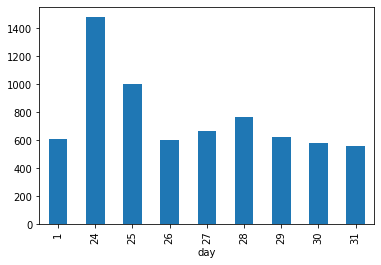

In [203]:
survey.groupby(['day'])['response_id'].count().plot(kind='bar') ## most data was collected on Monday.

In [108]:
survey.replace(to_replace='24ko',value=24, inplace=True) ## replacing non numeric value to numeric

In [136]:
(survey.loc[survey['age'] < 45].shape[0])/survey.shape[0]*100### percentage of voters less than 45 yrs age 

93.18479685452162

In [129]:
survey['age_group']=pd.cut(x=survey['age'], bins=[17,25,40,55,100], labels=['18-25','25-40','40-55','55+'])

In [211]:
dataframe=survey[['response_id','age','age_group']].set_index('response_id')
dataframe ## data frame containing age and age_group

,age,age_group
response_id,,
1,26,25-40
2,34,25-40
3,25,18-25
4,36,25-40
5,22,18-25
...,...,...
6863,25,18-25
6864,30,25-40
6865,20,18-25


In [213]:
survey.groupby(['age_group'])['response_id'].count() ###25-40 age group has most samples 

age_group
18-25    2692
25-40    3423
40-55     644
55+       108
Name: response_id, dtype: int64

In [35]:
(survey[(survey['Vote_Now']=='RJD') & (survey['Past_Vote']=='RJD')].shape[0]/survey.shape[0])*100### percentage of voters
                                                ####had opted for the RJD party in both the Vote_Now and the Past_Vote questions

11.810106305519149

In [36]:
survey['CM_satisfaction'].value_counts()

Fully Dissatisfied       3012
Somewhat Satisfied       2218
Fully Satisfied           721
Somewhat Dissatisfied     680
Can’t say                 236
Name: CM_satisfaction, dtype: int64

In [52]:
fully_satisfied=survey.groupby(['weekday','CM_satisfaction'])['response_id'].count()
fully_satisfied

weekday  CM_satisfaction      
1        Can’t say                 27
         Fully Dissatisfied       252
         Fully Satisfied           75
         Somewhat Dissatisfied     59
         Somewhat Satisfied       194
24       Can’t say                 41
         Fully Dissatisfied       642
         Fully Satisfied          146
         Somewhat Dissatisfied    147
         Somewhat Satisfied       503
25       Can’t say                 34
         Fully Dissatisfied       433
         Fully Satisfied           95
         Somewhat Dissatisfied     90
         Somewhat Satisfied       346
26       Can’t say                 22
         Fully Dissatisfied       258
         Fully Satisfied           59
         Somewhat Dissatisfied     51
         Somewhat Satisfied       208
27       Can’t say                 23
         Fully Dissatisfied       294
         Fully Satisfied           54
         Somewhat Dissatisfied     79
         Somewhat Satisfied       215
28       Can’t say 

In [54]:
survey.groupby(['weekday'])['response_id'].count()

weekday
1      607
24    1479
25     998
26     598
27     665
28     761
29     620
30     582
31     557
Name: response_id, dtype: int64

In [60]:
final=pd.DataFrame(fully_satisfied/survey.groupby(['weekday'])['response_id'].count()).reset_index()
final

,weekday,CM_satisfaction,response_id
0,1,Can’t say,0.044481
1,1,Fully Dissatisfied,0.415157
2,1,Fully Satisfied,0.123558
3,1,Somewhat Dissatisfied,0.097199
4,1,Somewhat Satisfied,0.319605
5,24,Can’t say,0.027721
6,24,Fully Dissatisfied,0.434077
7,24,Fully Satisfied,0.098715
8,24,Somewhat Dissatisfied,0.099391
9,24,Somewhat Satisfied,0.340095


In [196]:
final_result_satisfied=final[final['CM_satisfaction']=='Fully Satisfied'].rename(columns={'response_id':'Percentage'})
final_result_satisfied['Percentage']=final_result_satisfied['Percentage']*100
final_result_satisfied

,weekday,CM_satisfaction,Percentage
2,1,Fully Satisfied,12.355848
7,24,Fully Satisfied,9.871535
12,25,Fully Satisfied,9.519038
17,26,Fully Satisfied,9.866221
22,27,Fully Satisfied,8.120301
27,28,Fully Satisfied,12.089356
32,29,Fully Satisfied,11.774194
37,30,Fully Satisfied,11.168385
42,31,Fully Satisfied,11.131059


Text(0.5, 1.0, 'CM Satisfaction')

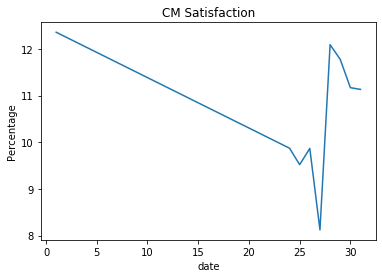

In [197]:
k=final_result_satisfied[['Percentage','weekday']]
plt.plot( k['weekday'],k['Percentage'])
plt.xlabel("date")
plt.ylabel("Percentage")
plt.title("CM Satisfaction")

In [69]:
fully_dissatisfied=survey.groupby(['weekday','MLA_satisfaction'])['response_id'].count()
fully_dissatisfied

weekday  MLA_satisfaction     
1        Can’t say                 27
         Fully Dissatisfied       385
         Fully Satisfied           55
         Somewhat Dissatisfied     49
         Somewhat Satisfied        91
24       Can’t say                 75
         Fully Dissatisfied       887
         Fully Satisfied          150
         Somewhat Dissatisfied    121
         Somewhat Satisfied       246
25       Can’t say                 46
         Fully Dissatisfied       630
         Fully Satisfied           72
         Somewhat Dissatisfied     70
         Somewhat Satisfied       180
26       Can’t say                 34
         Fully Dissatisfied       353
         Fully Satisfied           62
         Somewhat Dissatisfied     42
         Somewhat Satisfied       107
27       Can’t say                 37
         Fully Dissatisfied       403
         Fully Satisfied           61
         Somewhat Dissatisfied     57
         Somewhat Satisfied       107
28       Can’t say 

In [171]:
final_dissatisfaction=pd.DataFrame(fully_dissatisfied/survey.groupby(['weekday'])['response_id'].count()).reset_index()
final_dissatisfaction

,weekday,MLA_satisfaction,response_id
0,1,Can’t say,0.044481
1,1,Fully Dissatisfied,0.634267
2,1,Fully Satisfied,0.090610
3,1,Somewhat Dissatisfied,0.080725
4,1,Somewhat Satisfied,0.149918
5,24,Can’t say,0.050710
6,24,Fully Dissatisfied,0.599730
7,24,Fully Satisfied,0.101420
8,24,Somewhat Dissatisfied,0.081812
9,24,Somewhat Satisfied,0.166329


In [199]:
final_result_dissatisfied=final_dissatisfaction[final_dissatisfaction['MLA_satisfaction']=='Fully Dissatisfied'].rename(columns={'response_id':'Percentage'})
final_result_dissatisfied['Percentage']=final_result_dissatisfied['Percentage']*100
final_result_dissatisfied

,weekday,MLA_satisfaction,Percentage
1,1,Fully Dissatisfied,63.426689
6,24,Fully Dissatisfied,59.972955
11,25,Fully Dissatisfied,63.126253
16,26,Fully Dissatisfied,59.030100
21,27,Fully Dissatisfied,60.601504
26,28,Fully Dissatisfied,60.709593
31,29,Fully Dissatisfied,56.451613
36,30,Fully Dissatisfied,62.027491
41,31,Fully Dissatisfied,57.630162


Text(0.5, 1.0, 'MLA Dissatisfaction')

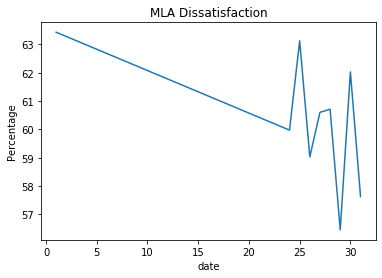

In [200]:
h=final_result_dissatisfied[['Percentage','weekday']]
plt.plot( h['weekday'],h['Percentage'])
plt.xlabel("date")
plt.ylabel("Percentage")
plt.title("MLA Dissatisfaction")

In [91]:
pd.pivot_table(survey,index='Past_Vote', columns='Vote_Now',values='response_id',aggfunc='count').fillna(0) ##Pivot table
                    ##ndex as Past_Vote, Column as Vote_Now and cell values as the count of samples.

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7.0,1.0,1630.0,3.0,5.0,42.0,101.0,110.0,44.0,13.0,194.0,32.0,87.0,370.0,88.0,24.0,62.0,10.0
BSP,0.0,1.0,2.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Did not vote,8.0,5.0,231.0,2.0,1.0,22.0,41.0,69.0,10.0,16.0,83.0,11.0,51.0,195.0,20.0,3.0,31.0,5.0
HAM,2.0,0.0,25.0,0.0,1.0,0.0,3.0,2.0,2.0,0.0,4.0,0.0,0.0,6.0,4.0,0.0,1.0,0.0
INC,0.0,6.0,6.0,0.0,0.0,57.0,10.0,9.0,0.0,3.0,6.0,3.0,3.0,100.0,1.0,2.0,7.0,0.0
JAP(L),0.0,0.0,4.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0
JD(U),6.0,10.0,254.0,2.0,2.0,45.0,72.0,279.0,29.0,9.0,90.0,18.0,43.0,435.0,13.0,25.0,36.0,6.0
LJP,0.0,0.0,76.0,1.0,0.0,4.0,3.0,6.0,9.0,2.0,3.0,0.0,2.0,17.0,1.0,0.0,1.0,0.0
Left Front,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,18.0,1.0,1.0,0.0,4.0,0.0,1.0,0.0,1.0


In [95]:
pd.pivot_table(survey,index='Past_Vote', columns='Vote_Now',values='weight',aggfunc='sum').fillna(0)##Pivot table
                    ##ndex as Past_Vote, Column as Vote_Now and cell values as the weeight.

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,0.000000,1.654731,5.174487,32.010277,0.000000,2.298223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,0.000000,25.348884,0.000000,1.648856,0.000000,0.712161,1.006719,2.496424,0.000000,0.928984,0.000000,0.000000,7.713008,1.903148,0.000000,0.039564,0.000000
INC,0.000000,11.105958,1.642875,0.000000,0.000000,161.742302,18.942597,11.077323,0.000000,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,0.000000
JAP(L),0.000000,0.000000,6.512846,0.000000,0.000000,0.000000,57.876224,0.000000,0.000000,0.000000,0.000000,3.195682,0.000000,2.164824,0.000000,0.000000,0.000000,0.000000
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806261,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,0.000000,0.000000,85.010450,2.481377,0.000000,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,0.000000,1.927965,30.737989,0.478933,0.000000,1.709409,0.000000
Left Front,0.000000,2.298223,0.209586,0.000000,0.000000,2.291368,0.000000,0.000000,0.000000,44.280864,0.201455,8.309203,0.000000,6.740281,0.000000,0.877960,0.000000,3.020887


In [137]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,weekday,age_group
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,24,25-40
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,24,25-40
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,24,18-25
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,24,25-40
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,24,18-25


In [167]:
grouping_over_age=pd.DataFrame(survey.groupby(['age_group'])['response_id'].count()).reset_index() ##group by over age_group and calculate the count of total samples under each age_group
grouping_over_age=grouping_over_age.rename(columns={'response_id':'count'})
grouping_over_age

,age_group,count
0,18-25,2692
1,25-40,3423
2,40-55,644
3,55+,108


In [159]:
name=pd.DataFrame(survey.groupby(['age_group','Vote_Now'])['response_id'].count()).reset_index()
name

,age_group,Vote_Now,response_id
0,18-25,AAP,11
1,18-25,AIMIM,15
2,18-25,BJP,792
3,18-25,BSP,9
4,18-25,HAM,4
...,...,...,...
59,55+,NOTA,8
60,55+,Others,1
61,55+,RJD,19
62,55+,RLSP,2


In [164]:
name=name[name['Vote_Now']=='JD(U)'] ## number of votes to JD(U) by age_group
name

,age_group,Vote_Now,response_id
7,18-25,JD(U),216
25,25-40,JD(U),245
42,40-55,JD(U),55
56,55+,JD(U),10


In [169]:
merged_data=pd.merge(grouping_over_age,name,left_on='age_group',right_on='age_group') ### merging 

In [170]:
merged_data

,age_group,count,Vote_Now,response_id
0,18-25,2692,JD(U),216
1,25-40,3423,JD(U),245
2,40-55,644,JD(U),55
3,55+,108,JD(U),10
